In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#load the csv file
df=pd.read_csv('C:/Users/Admin/Downloads/train.csv')

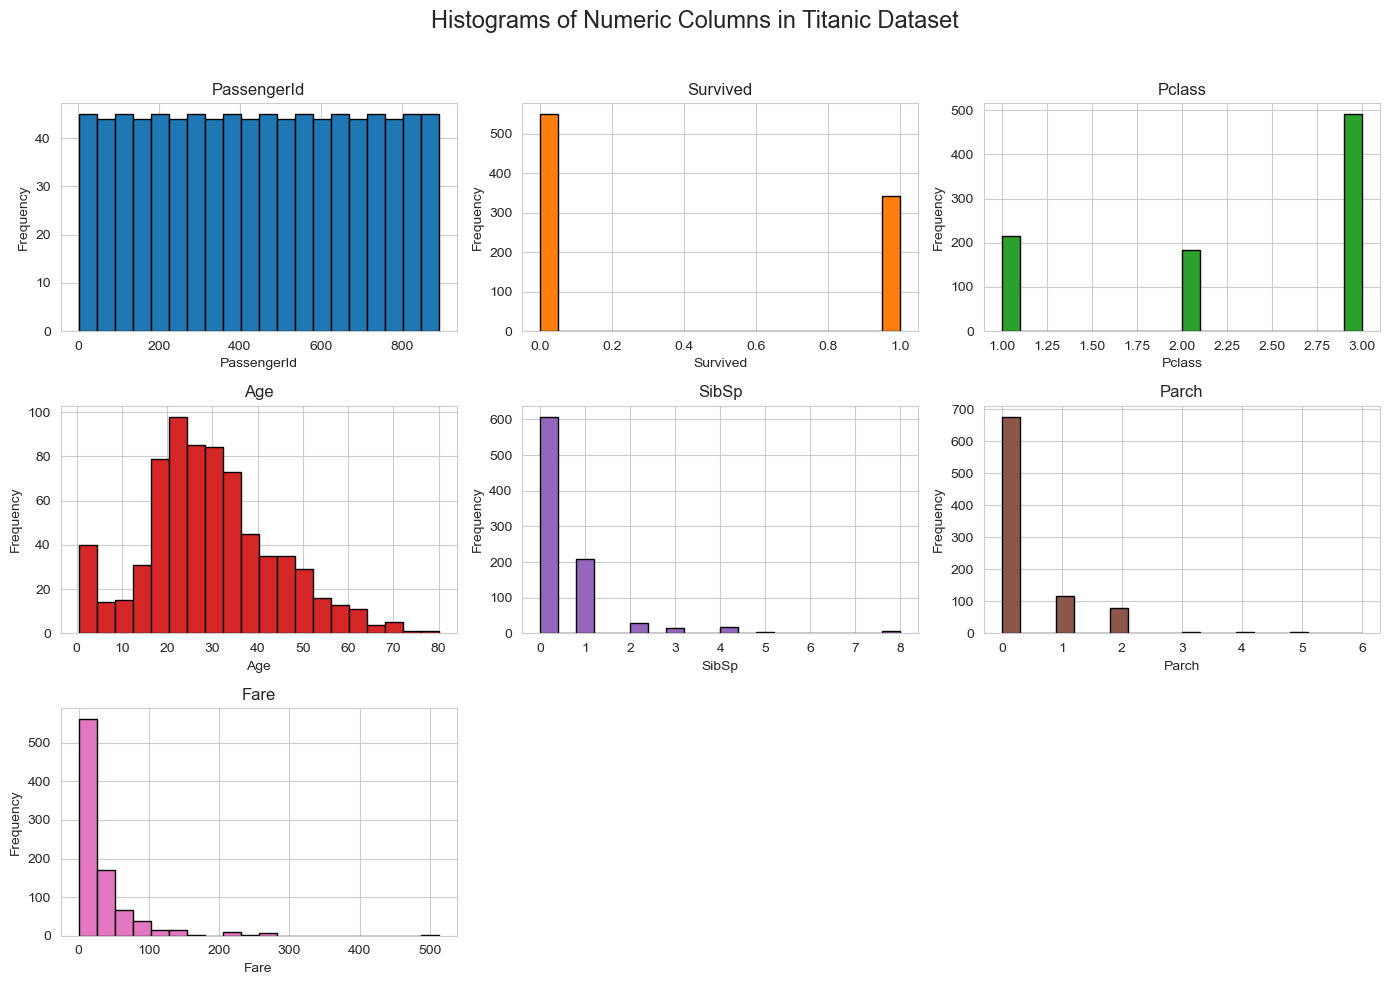

In [15]:
#1)Plotted histograms for numeric columns 
numeric_cols = df.select_dtypes(include=['number']).columns
colors = plt.cm.tab10.colors
# Create subplots
plt.figure(figsize=(14, 10))
# Loop through numeric columns and plot each histogram
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)  
    plt.hist(df[col].dropna(), bins=20, color=colors[i % len(colors)], edgecolor='black')
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
# Overall title
plt.suptitle('Histograms of Numeric Columns in Titanic Dataset', fontsize=17)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


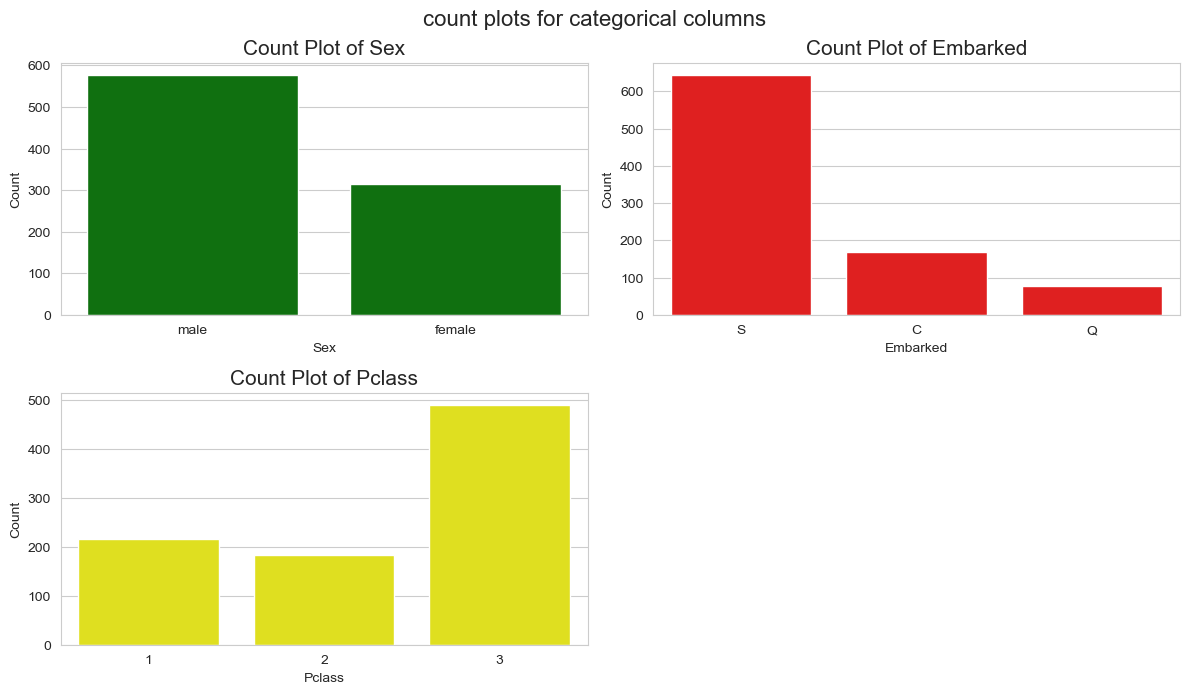

In [74]:
#2)count plots for categorical columns
sns.set_style("whitegrid")
categorical_cols = ['Sex', 'Embarked', 'Pclass']
custom_colors = ['green', 'red', 'yellow']  
plt.figure(figsize=(12, 10))

# Plot countplots for each categorical column
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col, color=custom_colors[i])
    plt.title(f'Count Plot of {col}', fontsize=15,)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.suptitle('count plots for categorical columns', fontsize=16)
plt.tight_layout()
plt.show()


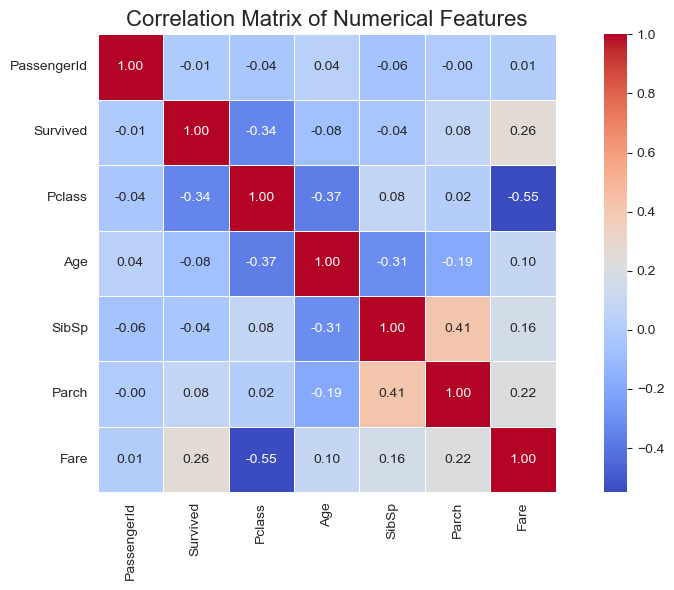

In [26]:
# Calculate correlation matrix for numeric relationships
correlation = df.corr(numeric_only=True)


sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


In [31]:
# dataset overview 
print("📐 Dataset Shape:", df.shape)
overview = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Missing Values': df.isnull().sum().values,    
})
print("📊 Dataset Overview:\n")
print(overview)


📐 Dataset Shape: (891, 12)
📊 Dataset Overview:

         Column Data Type  Missing Values
0   PassengerId     int64               0
1      Survived     int64               0
2        Pclass     int64               0
3          Name    object               0
4           Sex    object               0
5           Age   float64             177
6         SibSp     int64               0
7         Parch     int64               0
8        Ticket    object               0
9          Fare   float64               0
10        Cabin    object             687
11     Embarked    object               2


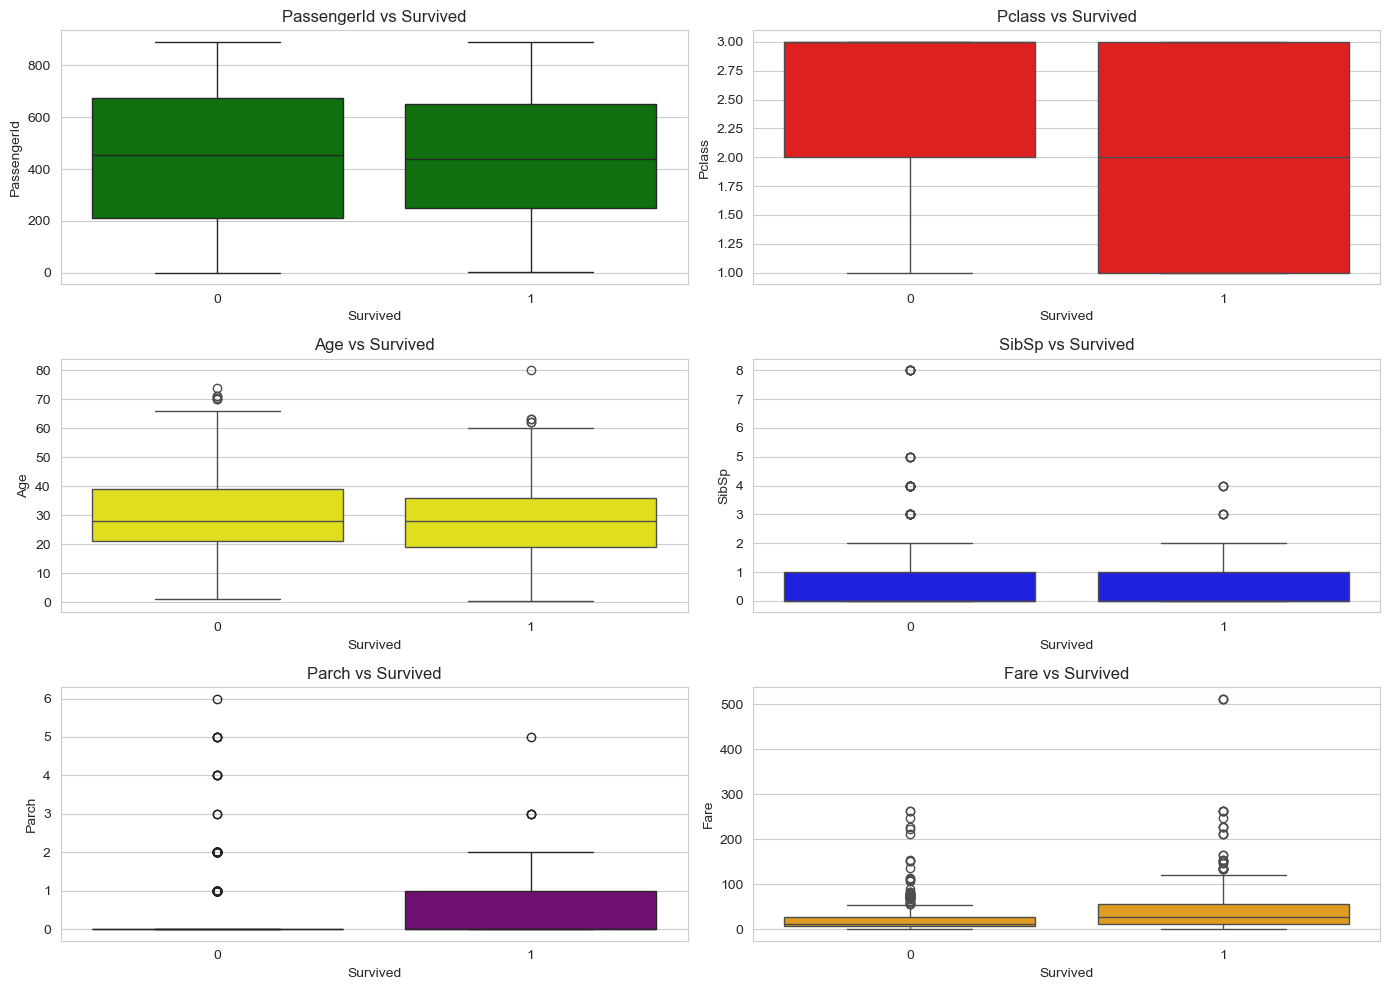

In [44]:
#3)Boxplots:survial vs Numeric columns
sns.set_style("whitegrid")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Survived')
custom_colors = ['green', 'red', 'yellow', 'blue', 'purple', 'orange', 'cyan', 'magenta']

plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) + 1) // 2, 2, i + 1)
    color = custom_colors[i % len(custom_colors)]  
    sns.boxplot(x='Survived', y=col, data=df, color=color)
    plt.title(f'{col} vs Survived')
    plt.xlabel('Survived')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


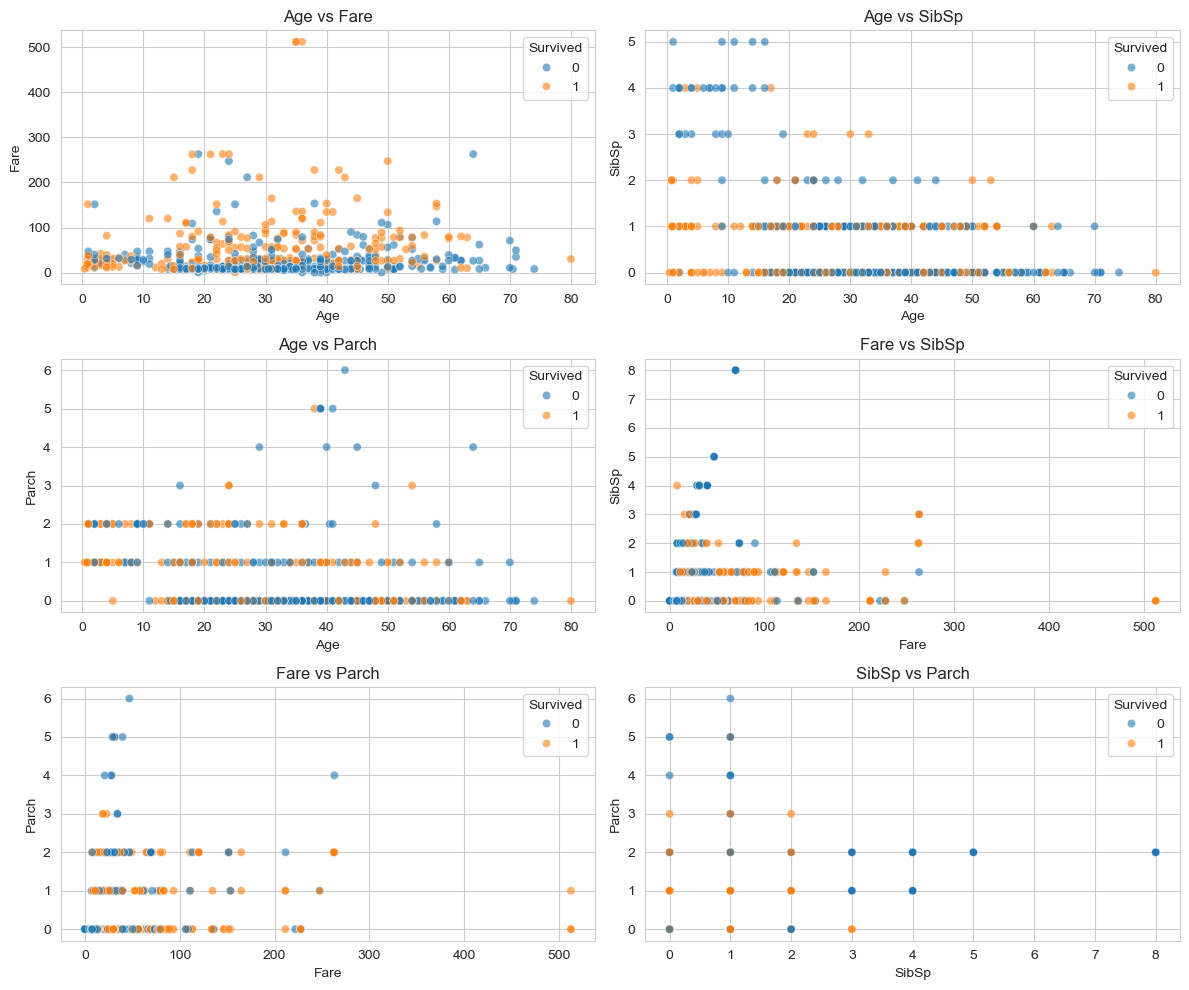

In [41]:
#4) Scatterplot: pairwise survial visualization
sns.set_style("whitegrid")
cols = ['Age', 'Fare', 'SibSp', 'Parch']
plt.figure(figsize=(12, 10))

# Plot all unique pairs
plot_num = 1
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        plt.subplot(3, 2, plot_num)
        sns.scatterplot(data=df, x=cols[i], y=cols[j], hue='Survived', alpha=0.6)
        plt.title(f'{cols[i]} vs {cols[j]}')
        plot_num += 1

plt.tight_layout()
plt.show()


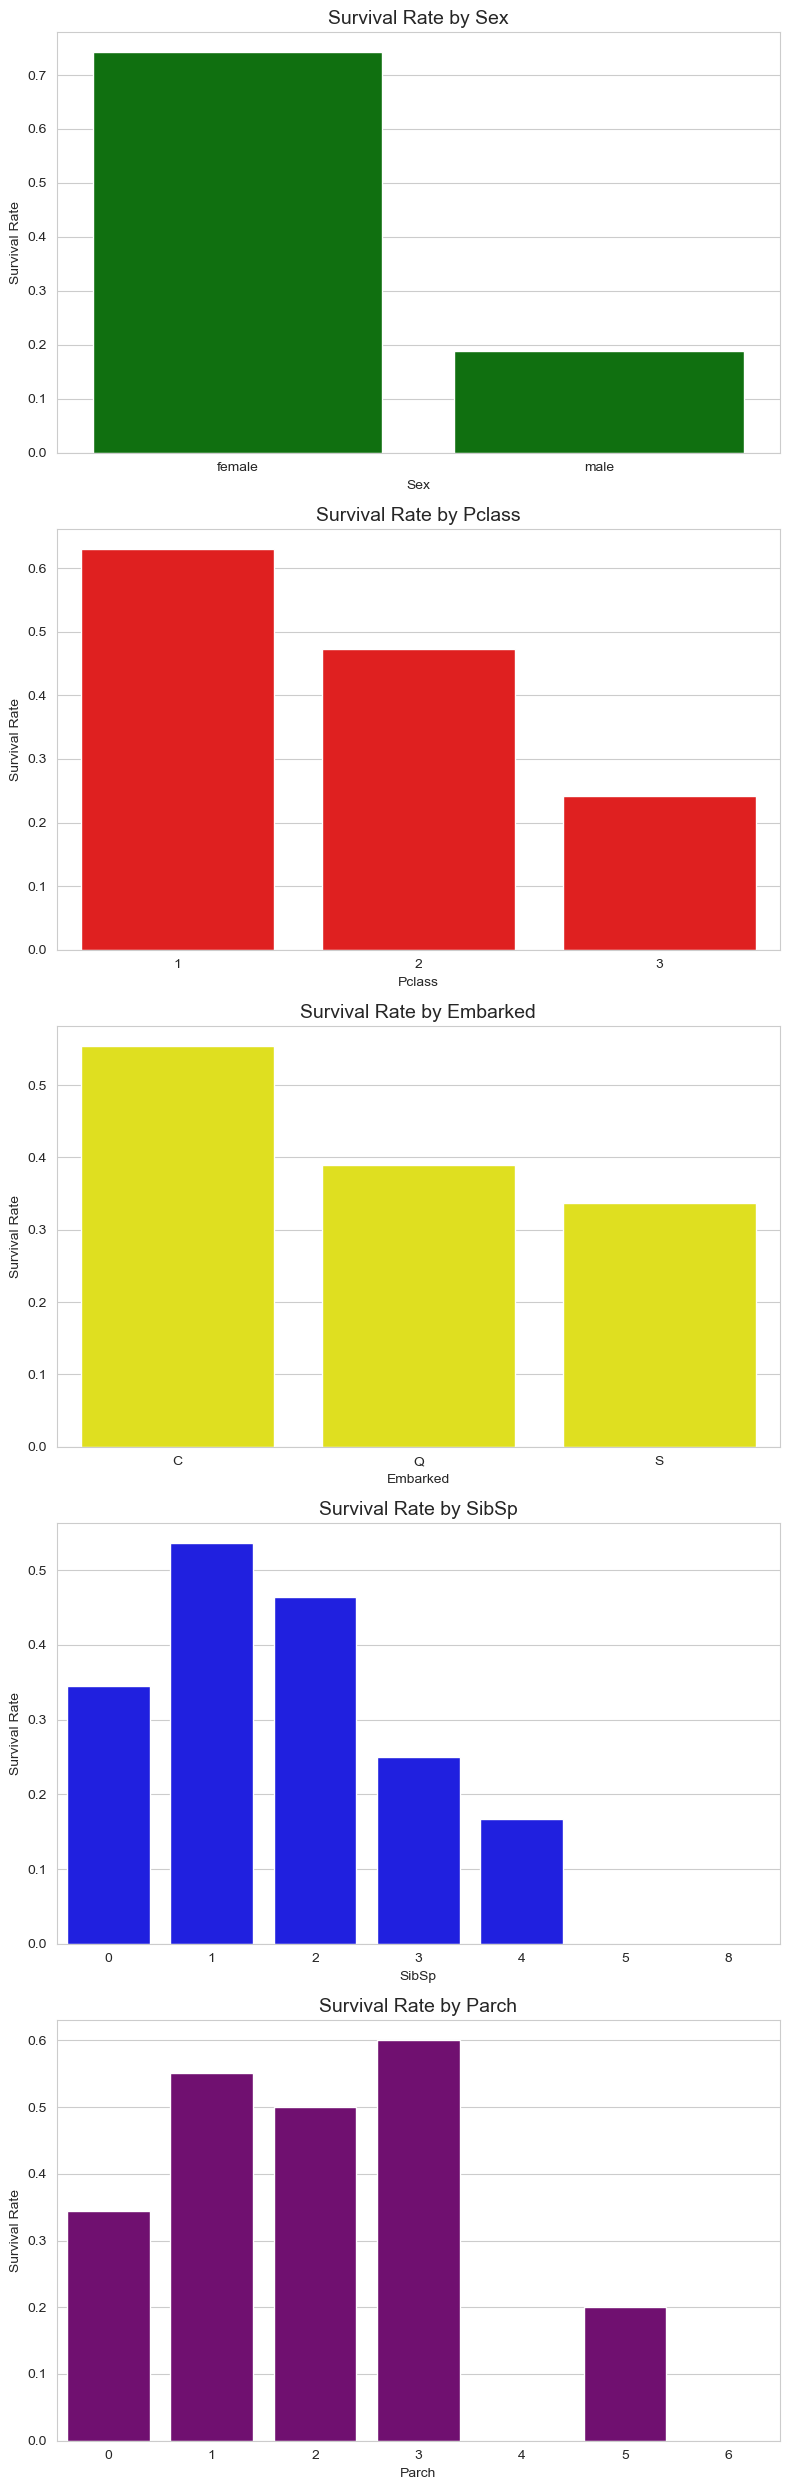

In [72]:
# 5)Survial rate by category
sns.set_style("whitegrid")
categorical_cols = ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']
custom_colors = ['green', 'red', 'yellow', 'blue', 'purple']
plt.figure(figsize=(8, 5 * len(categorical_cols)))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    survival_rates = df.groupby(col)['Survived'].mean().sort_values(ascending=False)
    sns.barplot(
        x=survival_rates.index,
        y=survival_rates.values,
        color=custom_colors[i % len(custom_colors)]
    )
    plt.title(f'Survival Rate by {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()


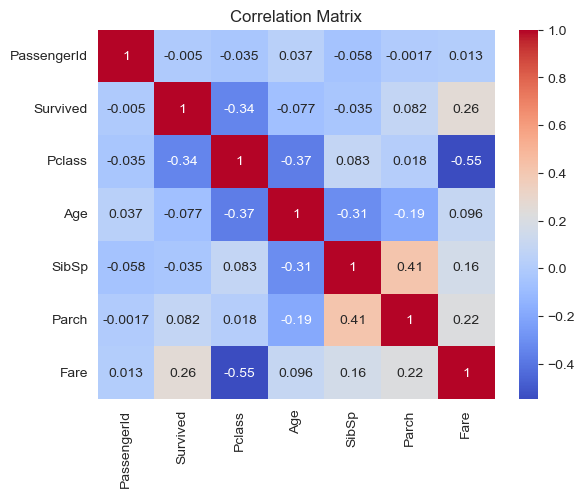

In [68]:
#6) correlation heatmap
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
